# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [1]:
import pandas as pd

In [2]:
mini = pd.read_table('data/mini.csv',sep=',')

In [3]:
mini.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [4]:
mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [5]:
mini.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

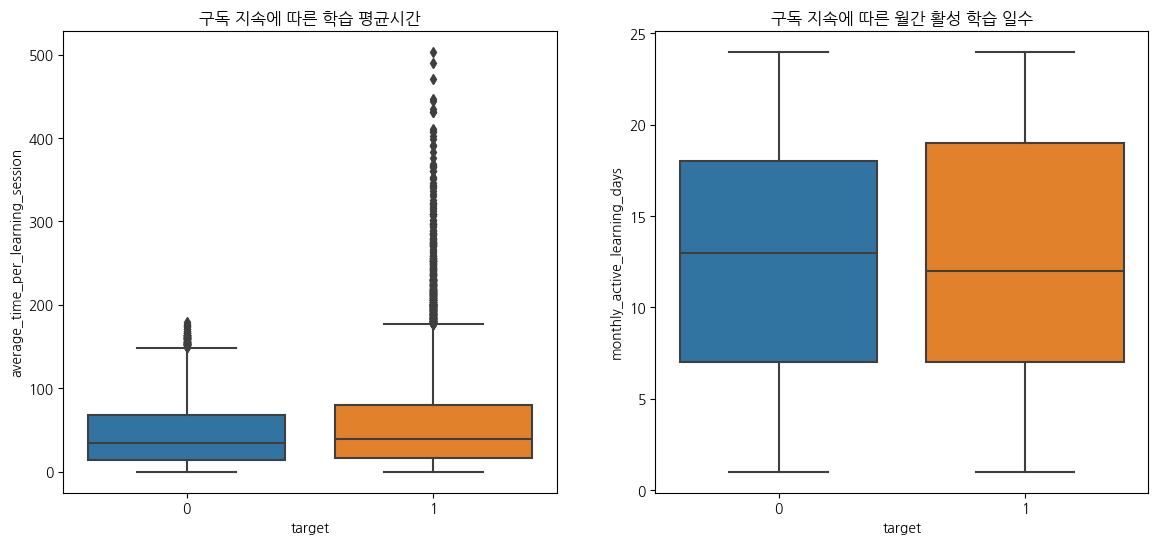

t-test result for average_time_per_learning_session: t-statistic = 11.908479164384307, p-value = 1.7717907181262619e-32
t-test result for monthly_active_learning_days: t-statistic = 0.48754772577850297, p-value = 0.6258809199870021
구독을 연장한 그룹과 연장하지 않은 그룹 간의 평균 학습 시간 차이는 유의미합니다.
구독을 연장한 그룹과 연장하지 않은 그룹 간의 월간 활동적인 학습 일수 차이는 유의미하지 않습니다.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import koreanize_matplotlib

# 데이터 불러오기
file_path = 'data/mini.csv'
mini = pd.read_table(file_path, sep=',')

# 데이터 기본 정보 확인
print(mini.info())
print(mini.describe())

# 결측치 확인 및 처리 (단순 대체)
numeric_columns = mini.select_dtypes(include='number').columns
mini[numeric_columns] = mini[numeric_columns].fillna(mini[numeric_columns].median())

# 데이터 탐색: 구독 연장 여부에 따른 평균 학습 시간 및 월간 활동적인 학습 일수
print(mini.groupby('target')[['average_time_per_learning_session', 'monthly_active_learning_days']].mean())

# 데이터 시각화: 구독 연장 여부에 따른 평균 학습 시간
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='target', y='average_time_per_learning_session', data=mini)
plt.title('구독 지속에 따른 학습 평균시간')

plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='monthly_active_learning_days', data=mini)
plt.title('구독 지속에 따른 월간 활성 학습 일수')

plt.show()

# t-검정: 평균 학습 시간의 차이가 유의한지 확인
t_stat1, p_val1 = stats.ttest_ind(
    mini[mini['target'] == 1]['average_time_per_learning_session'],
    mini[mini['target'] == 0]['average_time_per_learning_session']
)

# t-검정: 월간 활동적인 학습 일수의 차이가 유의한지 확인
t_stat2, p_val2 = stats.ttest_ind(
    mini[mini['target'] == 1]['monthly_active_learning_days'],
    mini[mini['target'] == 0]['monthly_active_learning_days']
)

print(f"t-test result for average_time_per_learning_session: t-statistic = {t_stat1}, p-value = {p_val1}")
print(f"t-test result for monthly_active_learning_days: t-statistic = {t_stat2}, p-value = {p_val2}")

# 분석 결과 요약
if p_val1 < 0.05:
    print("구독을 연장한 그룹과 연장하지 않은 그룹 간의 평균 학습 시간 차이는 유의미합니다.")
else:
    print("구독을 연장한 그룹과 연장하지 않은 그룹 간의 평균 학습 시간 차이는 유의미하지 않습니다.")

if p_val2 < 0.05:
    print("구독을 연장한 그룹과 연장하지 않은 그룹 간의 월간 활동적인 학습 일수 차이는 유의미합니다.")
else:
    print("구독을 연장한 그룹과 연장하지 않은 그룹 간의 월간 활동적인 학습 일수 차이는 유의미하지 않습니다.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

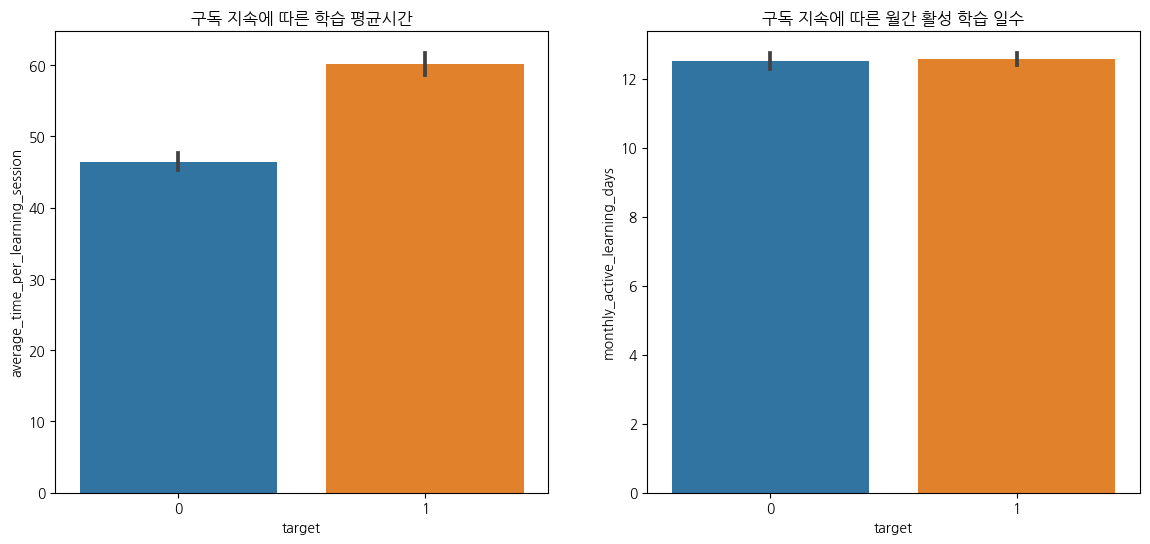

t-test result for average_time_per_learning_session: t-statistic = 11.908479164384307, p-value = 1.7717907181262619e-32
t-test result for monthly_active_learning_days: t-statistic = 0.48754772577850297, p-value = 0.6258809199870021
구독을 연장한 그룹과 연장하지 않은 그룹 간의 평균 학습 시간 차이는 유의미합니다.
구독을 연장한 그룹과 연장하지 않은 그룹 간의 월간 활동적인 학습 일수 차이는 유의미하지 않습니다.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import koreanize_matplotlib

# 데이터 불러오기
file_path = 'data/mini.csv'
mini = pd.read_table(file_path, sep=',')

# 데이터 기본 정보 확인
print(mini.info())
print(mini.describe())

# 결측치 확인 및 처리 (단순 대체)
numeric_columns = mini.select_dtypes(include='number').columns
mini[numeric_columns] = mini[numeric_columns].fillna(mini[numeric_columns].median())

# 데이터 탐색: 구독 연장 여부에 따른 평균 학습 시간 및 월간 활동적인 학습 일수
print(mini.groupby('target')[['average_time_per_learning_session', 'monthly_active_learning_days']].mean())

# 데이터 시각화: 구독 연장 여부에 따른 평균 학습 시간
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='target', y='average_time_per_learning_session', data=mini)
plt.title('구독 지속에 따른 학습 평균시간')

plt.subplot(1, 2, 2)
sns.barplot(x='target', y='monthly_active_learning_days', data=mini)
plt.title('구독 지속에 따른 월간 활성 학습 일수')

plt.show()

# t-검정: 평균 학습 시간의 차이가 유의한지 확인
t_stat1, p_val1 = stats.ttest_ind(
    mini[mini['target'] == 1]['average_time_per_learning_session'],
    mini[mini['target'] == 0]['average_time_per_learning_session']
)

# t-검정: 월간 활동적인 학습 일수의 차이가 유의한지 확인
t_stat2, p_val2 = stats.ttest_ind(
    mini[mini['target'] == 1]['monthly_active_learning_days'],
    mini[mini['target'] == 0]['monthly_active_learning_days']
)

print(f"t-test result for average_time_per_learning_session: t-statistic = {t_stat1}, p-value = {p_val1}")
print(f"t-test result for monthly_active_learning_days: t-statistic = {t_stat2}, p-value = {p_val2}")

# 분석 결과 요약
if p_val1 < 0.05:
    print("구독을 연장한 그룹과 연장하지 않은 그룹 간의 평균 학습 시간 차이는 유의미합니다.")
else:
    print("구독을 연장한 그룹과 연장하지 않은 그룹 간의 평균 학습 시간 차이는 유의미하지 않습니다.")

if p_val2 < 0.05:
    print("구독을 연장한 그룹과 연장하지 않은 그룹 간의 월간 활동적인 학습 일수 차이는 유의미합니다.")
else:
    print("구독을 연장한 그룹과 연장하지 않은 그룹 간의 월간 활동적인 학습 일수 차이는 유의미하지 않습니다.")


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import koreanize_matplotlib

# 데이터 불러오기
file_path = 'data/mini.csv'
mini = pd.read_table(file_path, sep=',')

# 데이터 기본 정보 확인
print(mini.info())
print(mini.describe())

# 결측치 확인 및 처리 (단순 대체)
numeric_columns = mini.select_dtypes(include='number').columns
mini[numeric_columns] = mini[numeric_columns].fillna(mini[numeric_columns].median())

# 데이터 확인
print(mini.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

target
0    46.456986
1    60.105533
Name: average_time_per_learning_session, dtype: float64


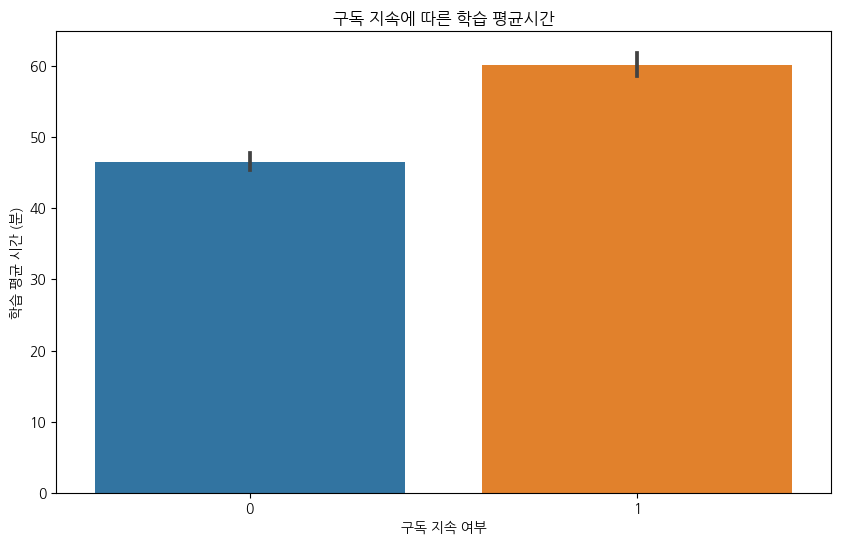

In [9]:
# 구독 연장 여부에 따른 평균 학습 시간 확인
grouped_data = mini.groupby('target')['average_time_per_learning_session'].mean()
print(grouped_data)

# 데이터 시각화: 구독 연장 여부에 따른 평균 학습 시간
plt.figure(figsize=(10, 6))
sns.barplot(x='target', y='average_time_per_learning_session', data=mini)
plt.title('구독 지속에 따른 학습 평균시간')
plt.xlabel('구독 지속 여부')
plt.ylabel('학습 평균 시간 (분)')
plt.show()


C:\Users\cyh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cyh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


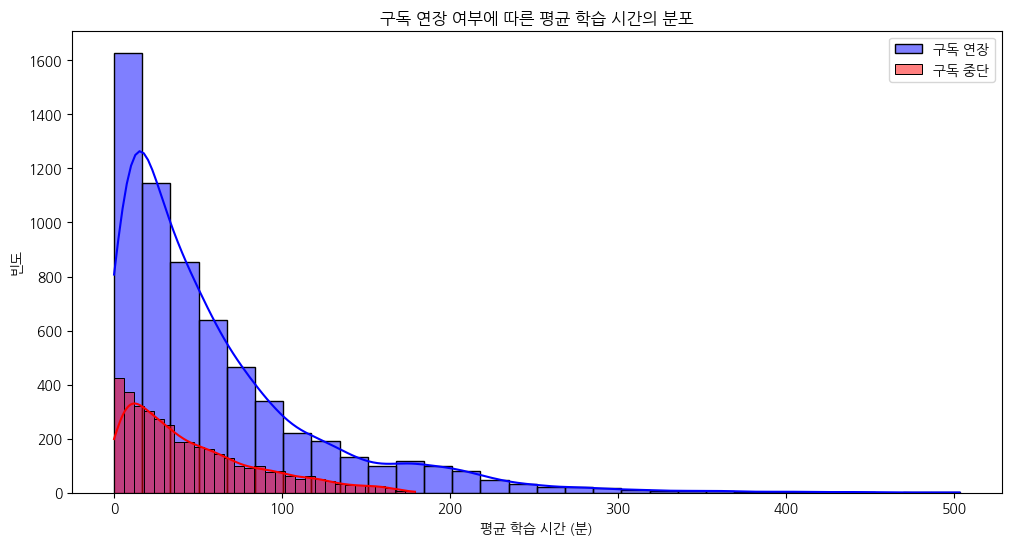

In [10]:
# 히스토그램 및 KDE 플롯: 구독 연장 여부에 따른 평균 학습 시간의 분포
plt.figure(figsize=(12, 6))

# 구독 연장 그룹 (target == 1)
sns.histplot(mini[mini['target'] == 1]['average_time_per_learning_session'], kde=True, color='blue', label='구독 연장', bins=30)
# 구독 연장하지 않은 그룹 (target == 0)
sns.histplot(mini[mini['target'] == 0]['average_time_per_learning_session'], kde=True, color='red', label='구독 중단', bins=30)

plt.title('구독 연장 여부에 따른 평균 학습 시간의 분포')
plt.xlabel('평균 학습 시간 (분)')
plt.ylabel('빈도')
plt.legend()
plt.show()


C:\Users\cyh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


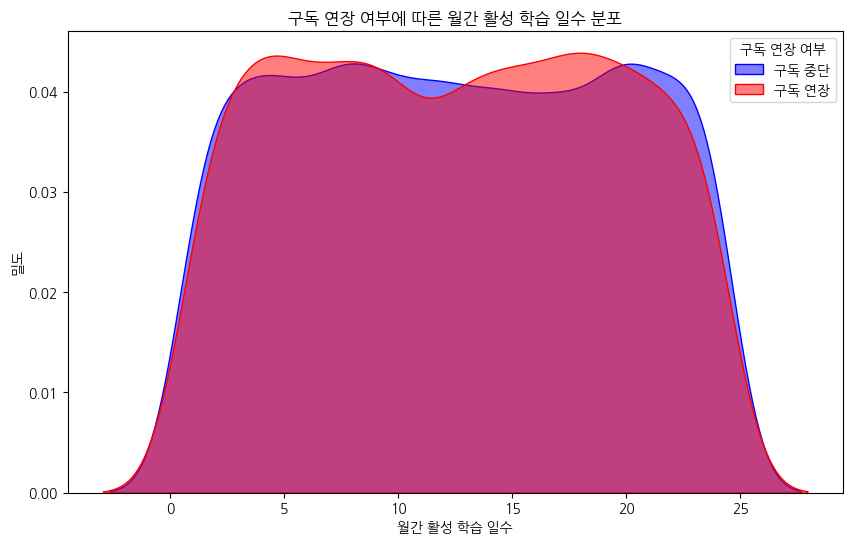

In [11]:
# monthly_active_learning_days의 분포에 따른 구독 연장 여부 시각화
plt.figure(figsize=(10, 6))

# KDE 플롯: 구독 연장 여부에 따른 monthly_active_learning_days의 분포
sns.kdeplot(data=mini, x='monthly_active_learning_days', hue='target', fill=True, common_norm=False, palette={0: 'red', 1: 'blue'}, alpha=0.5)

plt.title('구독 연장 여부에 따른 월간 활성 학습 일수 분포')
plt.xlabel('월간 활성 학습 일수')
plt.ylabel('밀도')
plt.legend(title='구독 연장 여부', labels=['구독 중단', '구독 연장'])
plt.show()


In [12]:
# 구독 연장 여부에 따른 monthly_active_learning_days의 평균 계산
grouped_data = mini.groupby('target')['monthly_active_learning_days'].mean()
print(grouped_data)

# t-검정: 구독 연장 여부에 따른 monthly_active_learning_days의 차이가 유의한지 확인
t_stat, p_val = stats.ttest_ind(
    mini[mini['target'] == 1]['monthly_active_learning_days'],
    mini[mini['target'] == 0]['monthly_active_learning_days']
)

# t-검정 결과 출력
print(f"t-test result for monthly_active_learning_days: t-statistic = {t_stat}, p-value = {p_val}")

# 분석 결과 요약
if p_val < 0.05:
    print("구독을 연장한 그룹과 연장하지 않은 그룹 간의 월간 활성 학습 일수 차이는 유의미합니다.")
else:
    print("구독을 연장한 그룹과 연장하지 않은 그룹 간의 월간 활성 학습 일수 차이는 유의미하지 않습니다.")


target
0    12.502236
1    12.571866
Name: monthly_active_learning_days, dtype: float64
t-test result for monthly_active_learning_days: t-statistic = 0.48754772577850297, p-value = 0.6258809199870021
구독을 연장한 그룹과 연장하지 않은 그룹 간의 월간 활성 학습 일수 차이는 유의미하지 않습니다.


In [13]:
# monthly_active_learning_days를 일정 범위로 나누어 범주형 데이터로 변환
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']
mini['monthly_active_learning_days_binned'] = pd.cut(mini['monthly_active_learning_days'], bins=bins, labels=labels, right=False)

# 교차표 생성
crosstab = pd.crosstab(mini['monthly_active_learning_days_binned'], mini['target'], normalize='index')
print(crosstab)


target                                      0         1
monthly_active_learning_days_binned                    
0-5                                  0.376364  0.623636
6-10                                 0.385741  0.614259
11-15                                0.375368  0.624632
16-20                                0.399324  0.600676
21-25                                0.363165  0.636835


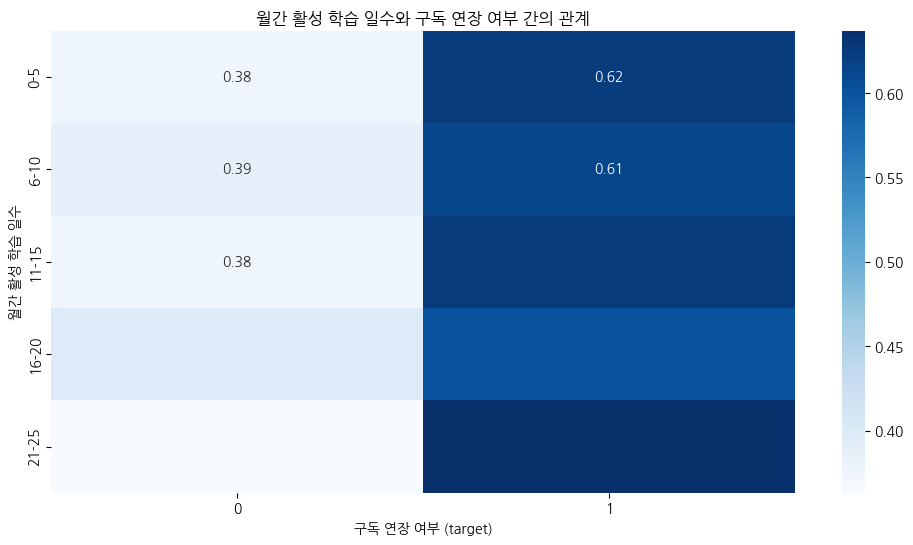

In [14]:
# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(crosstab, annot=True, fmt='.2f', cmap='Blues')

plt.title('월간 활성 학습 일수와 구독 연장 여부 간의 관계')
plt.xlabel('구독 연장 여부 (target)')
plt.ylabel('월간 활성 학습 일수')
plt.show()


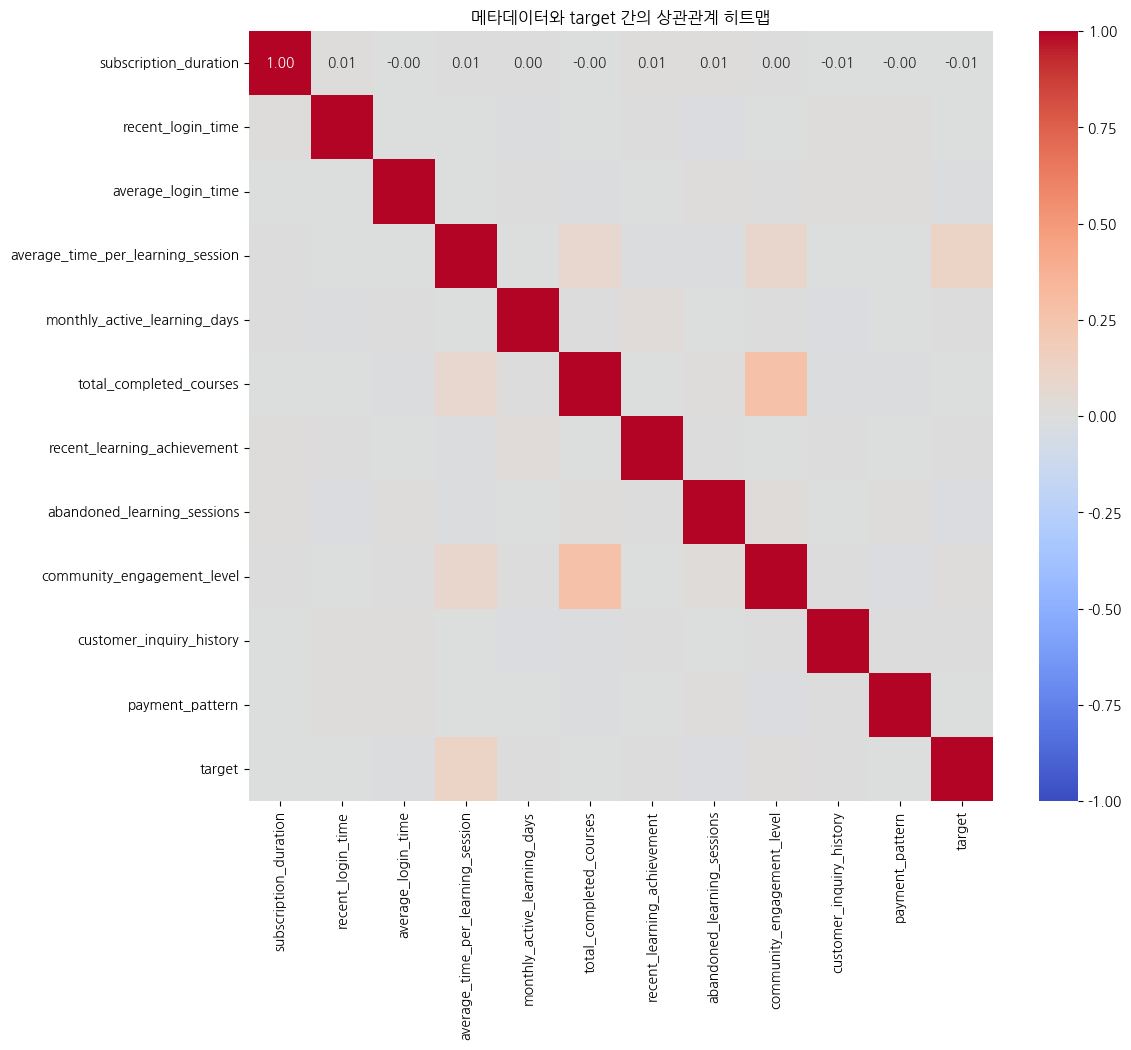

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib


# 결측치 확인 및 처리 (단순 대체)
numeric_columns = mini.select_dtypes(include='number').columns
mini[numeric_columns] = mini[numeric_columns].fillna(mini[numeric_columns].median())

# 수치형 데이터만 선택
numeric_data = mini[numeric_columns]

# 전체 메타데이터와 target 간의 상관관계 계산
correlation_matrix = numeric_data.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

plt.title('메타데이터와 target 간의 상관관계 히트맵')
plt.show()


상관계수 (recent_learning_achievement vs target): 0.00


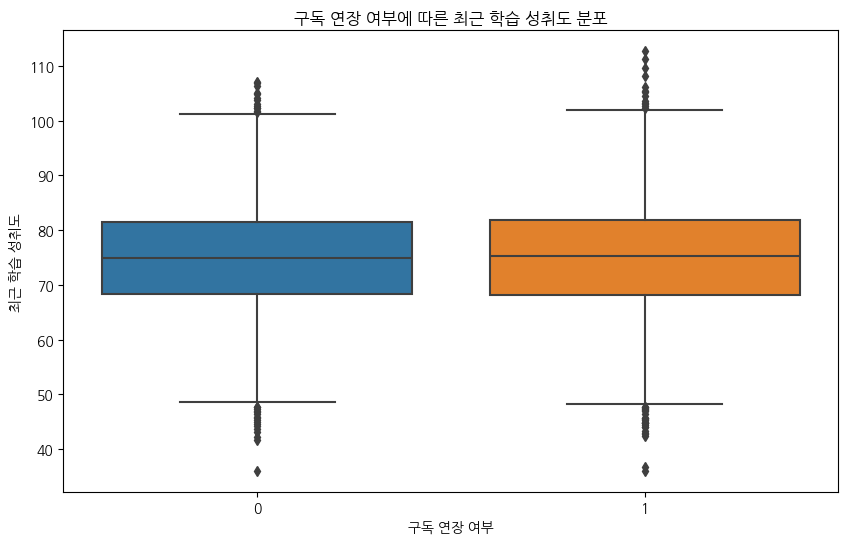

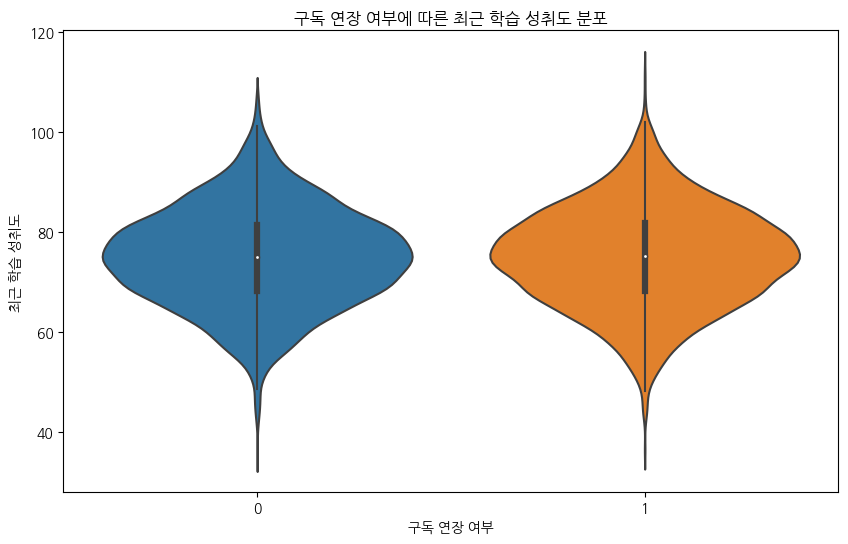

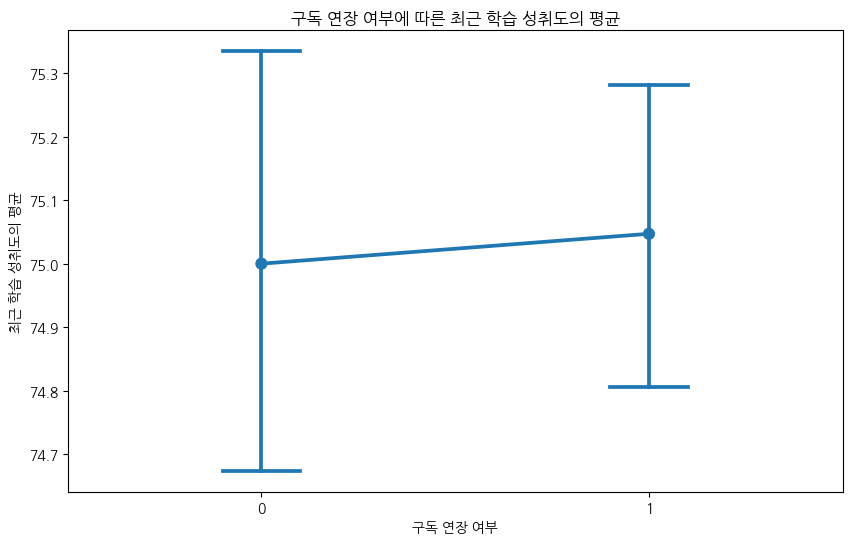

ValueError: could not convert string to float: 'b919c29d'

In [23]:
# 상관 분석
correlation = mini['recent_learning_achievement'].corr(mini['target'])
print(f"상관계수 (recent_learning_achievement vs target): {correlation:.2f}")

# 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='recent_learning_achievement', data=mini)
plt.title('구독 연장 여부에 따른 최근 학습 성취도 분포')
plt.xlabel('구독 연장 여부')
plt.ylabel('최근 학습 성취도')
plt.show()

# 바이올린 플롯 시각화
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='recent_learning_achievement', data=mini)
plt.title('구독 연장 여부에 따른 최근 학습 성취도 분포')
plt.xlabel('구독 연장 여부')
plt.ylabel('최근 학습 성취도')
plt.show()

# 포인트 플롯 시각화
plt.figure(figsize=(10, 6))
sns.pointplot(x='target', y='recent_learning_achievement', data=mini, capsize=.2)
plt.title('구독 연장 여부에 따른 최근 학습 성취도의 평균')
plt.xlabel('구독 연장 여부')
plt.ylabel('최근 학습 성취도의 평균')
plt.show()

# 히트맵 시각화
correlation_matrix = mini.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('메타데이터와 target 간의 상관관계 히트맵')
plt.show()

# 로지스틱 회귀 분석
import statsmodels.api as sm

# 독립 변수와 종속 변수 설정
X = mini[['recent_learning_achievement']]
y = mini['target']

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 적합
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 결과 출력
print(result.summary())

In [24]:
correlation = mini['community_engagement_level'].corr(mini['target'])
print(f"상관계수 (community_engagement_level vs target): {correlation:.2f}")


상관계수 (community_engagement_level vs target): 0.01


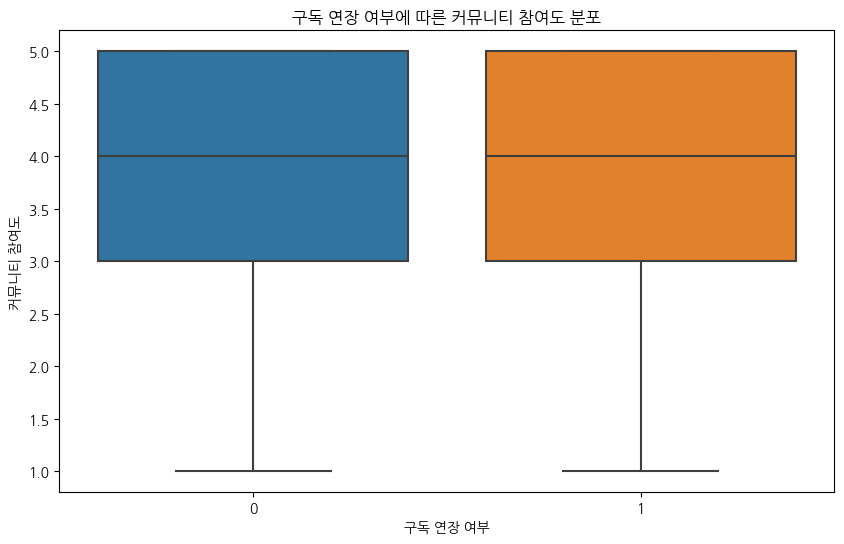

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='community_engagement_level', data=mini)
plt.title('구독 연장 여부에 따른 커뮤니티 참여도 분포')
plt.xlabel('구독 연장 여부')
plt.ylabel('커뮤니티 참여도')
plt.show()


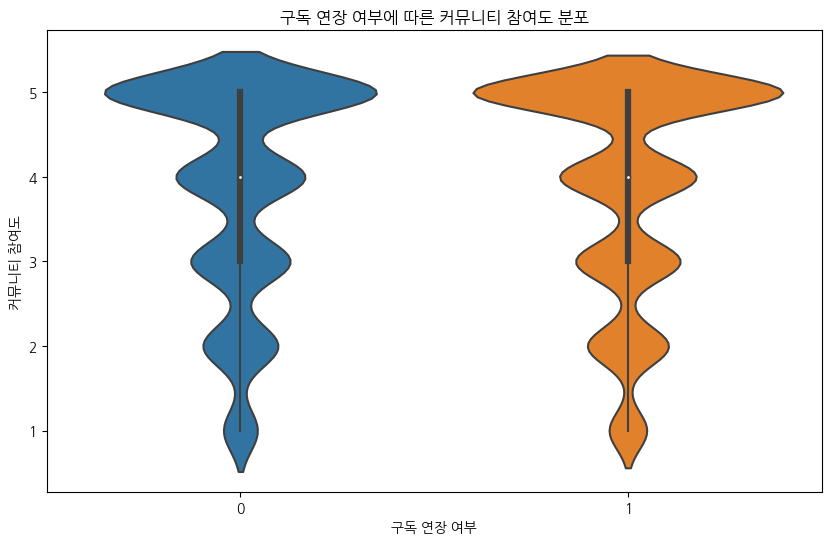

In [26]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='community_engagement_level', data=mini)
plt.title('구독 연장 여부에 따른 커뮤니티 참여도 분포')
plt.xlabel('구독 연장 여부')
plt.ylabel('커뮤니티 참여도')
plt.show()


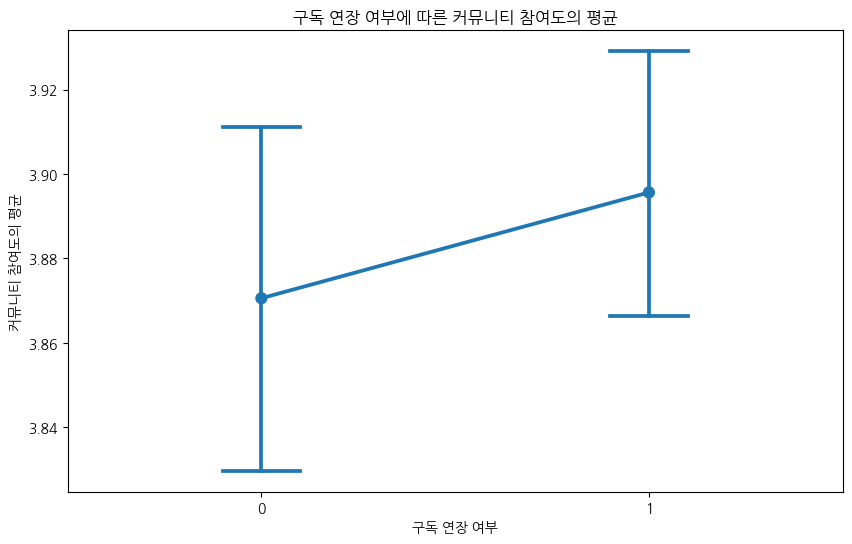

In [29]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='target', y='community_engagement_level', data=mini, capsize=.2)
plt.title('구독 연장 여부에 따른 커뮤니티 참여도의 평균')
plt.xlabel('구독 연장 여부')
plt.ylabel('커뮤니티 참여도의 평균')
plt.show()


In [28]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 설정
X = mini[['community_engagement_level']]
y = mini['target']

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 적합
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 결과 출력
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.664067
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Jul 2024   Pseudo R-squ.:               6.989e-05
Time:                        00:37:23   Log-Likelihood:                -6640.7
converged:                       True   LL-Null:                       -6641.1
Covariance Type:            nonrobust   LLR p-value:                    0.3353
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4281      0.066      6.439      0.000      

상관계수 (preferred_difficulty_level_cat vs target): 0.01


C:\Users\cyh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


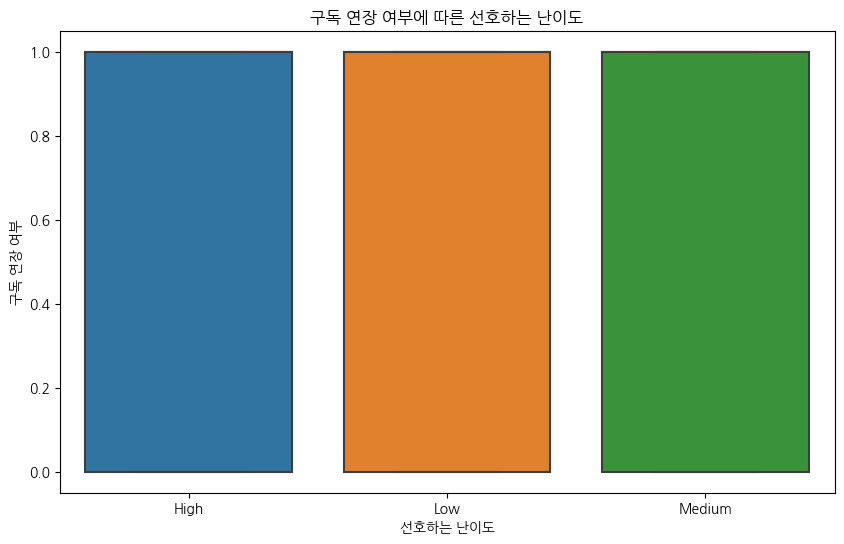

C:\Users\cyh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


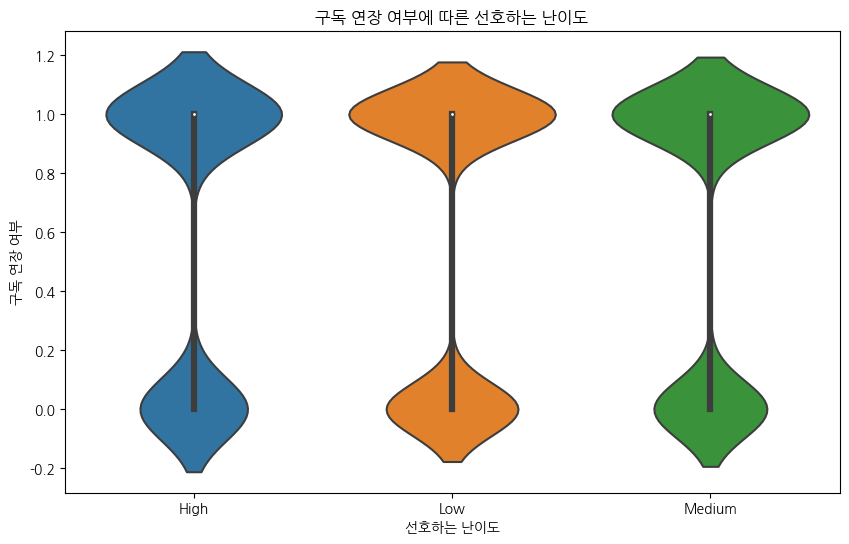

C:\Users\cyh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


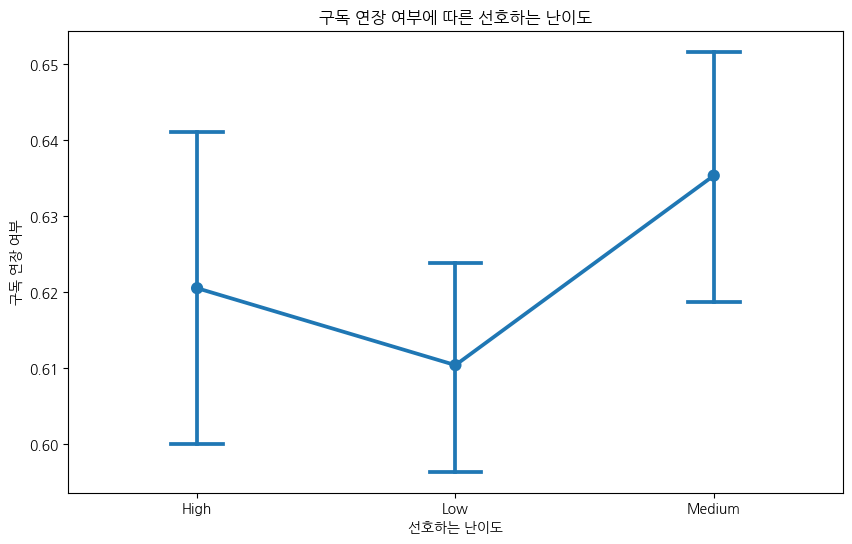

Optimization terminated successfully.
         Current function value: 0.664025
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Jul 2024   Pseudo R-squ.:               0.0001327
Time:                        00:41:16   Log-Likelihood:                -6640.2
converged:                       True   LL-Null:                       -6641.1
Covariance Type:            nonrobust   LLR p-value:                    0.1844
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.4462      0.038     11.665     

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import koreanize_matplotlib
import statsmodels.api as sm


# 결측치 확인 및 처리 (단순 대체)
numeric_columns = mini.select_dtypes(include='number').columns
mini[numeric_columns] = mini[numeric_columns].fillna(mini[numeric_columns].median())

# 선호하는 난이도는 범주형 변수이므로 별도의 전처리 필요
# 범주형 변수를 숫자로 인코딩
mini['preferred_difficulty_level'] = mini['preferred_difficulty_level'].astype('category')
mini['preferred_difficulty_level_cat'] = mini['preferred_difficulty_level'].cat.codes

# 상관 분석
correlation = mini['preferred_difficulty_level_cat'].corr(mini['target'])
print(f"상관계수 (preferred_difficulty_level_cat vs target): {correlation:.2f}")

# 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='preferred_difficulty_level', y='target', data=mini)
plt.title('구독 연장 여부에 따른 선호하는 난이도')
plt.xlabel('선호하는 난이도')
plt.ylabel('구독 연장 여부')
plt.show()

# 바이올린 플롯 시각화
plt.figure(figsize=(10, 6))
sns.violinplot(x='preferred_difficulty_level', y='target', data=mini)
plt.title('구독 연장 여부에 따른 선호하는 난이도')
plt.xlabel('선호하는 난이도')
plt.ylabel('구독 연장 여부')
plt.show()

# 포인트 플롯 시각화
plt.figure(figsize=(10, 6))
sns.pointplot(x='preferred_difficulty_level', y='target', data=mini, capsize=.2)
plt.title('구독 연장 여부에 따른 선호하는 난이도')
plt.xlabel('선호하는 난이도')
plt.ylabel('구독 연장 여부')
plt.show()

# 로지스틱 회귀 분석
# 독립 변수와 종속 변수 설정
X = mini[['preferred_difficulty_level_cat']]
y = mini['target']

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 적합
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 결과 출력
print(result.summary())


target                             0         1
preferred_difficulty_level                    
High                        0.379500  0.620500
Low                         0.389623  0.610377
Medium                      0.364694  0.635306


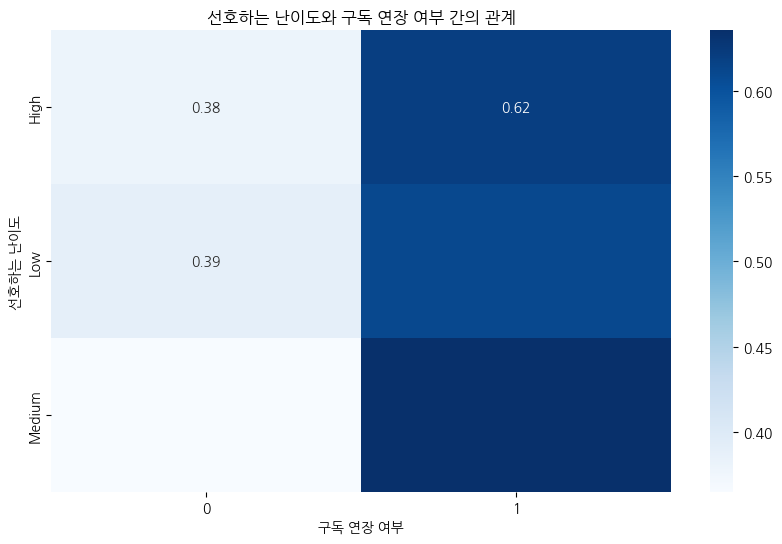

In [32]:
# 교차표 생성
crosstab = pd.crosstab(mini['preferred_difficulty_level'], mini['target'], normalize='index')
print(crosstab)

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='.2f', cmap='Blues')

plt.title('선호하는 난이도와 구독 연장 여부 간의 관계')
plt.xlabel('구독 연장 여부')
plt.ylabel('선호하는 난이도')
plt.show()


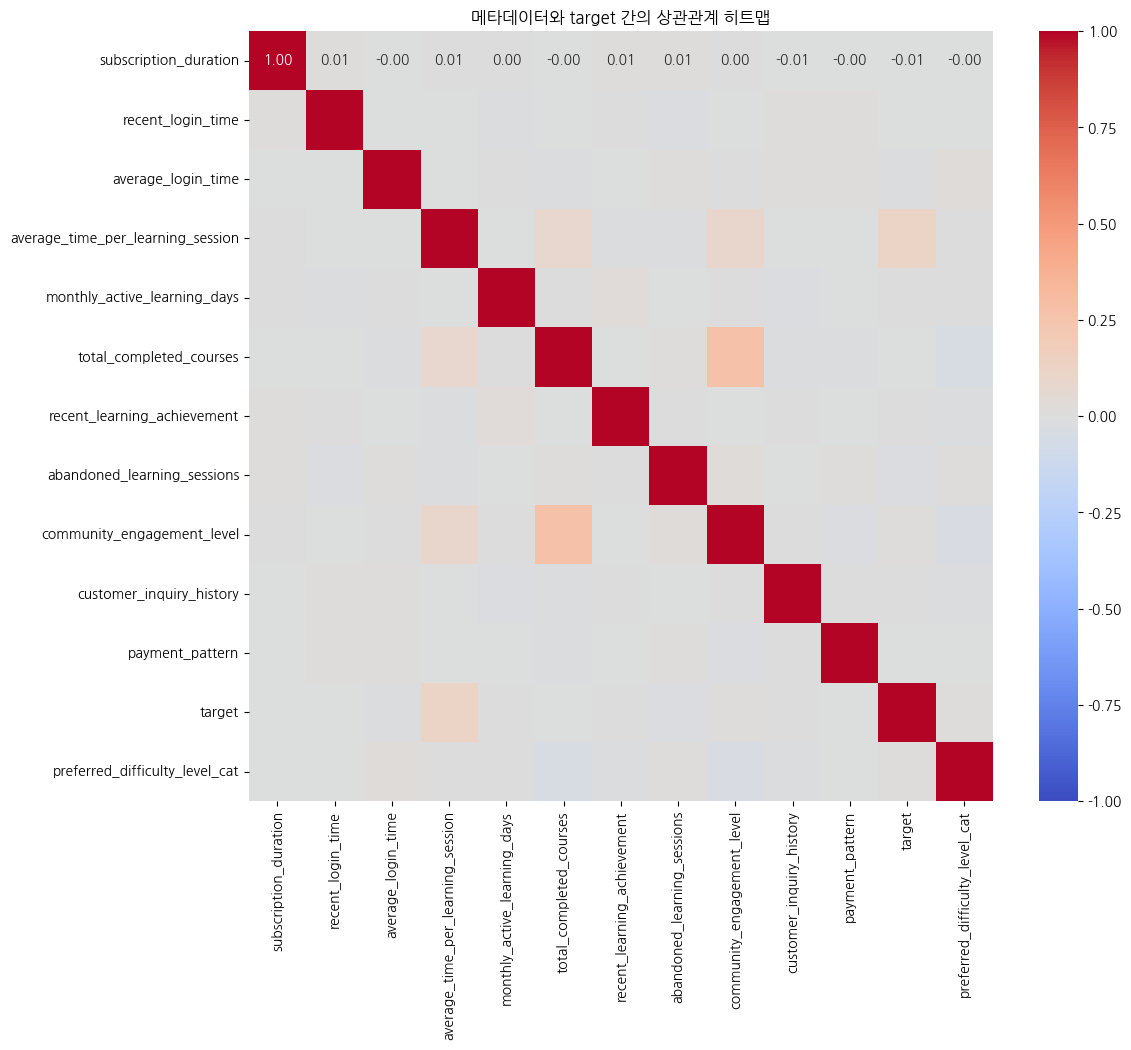

In [33]:
# 선호하는 난이도는 범주형 변수이므로 별도의 전처리 필요
# 범주형 변수를 숫자로 인코딩
mini['preferred_difficulty_level'] = mini['preferred_difficulty_level'].astype('category')
mini['preferred_difficulty_level_cat'] = mini['preferred_difficulty_level'].cat.codes

# 수치형 데이터만 선택
numeric_columns = mini.select_dtypes(include='number').columns
numeric_data = mini[numeric_columns]

# 전체 메타데이터와 target 간의 상관관계 계산
correlation_matrix = numeric_data.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

plt.title('메타데이터와 target 간의 상관관계 히트맵')
plt.show()


In [35]:
t1 = mini[mini['target'] == 1]
t1
t1.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target,preferred_difficulty_level_cat
count,6199.00000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.0,6199.000000
mean,11.86272,14.985804,14.974035,60.105533,12.571866,12.216003,75.047419,3.016616,3.895628,2.010808,3.500403,1.0,1.108082
std,6.59050,8.322310,3.029275,63.477523,6.980077,3.636558,10.027058,1.754416,1.264061,1.428306,2.316925,0.0,0.704888
min,1.00000,1.000000,2.366189,0.013535,1.000000,2.000000,36.115562,0.000000,1.000000,0.000000,0.000000,1.0,0.000000
25%,6.00000,8.000000,12.976618,15.908562,7.000000,10.000000,68.249866,2.000000,3.000000,1.000000,1.000000,1.0,1.000000
50%,12.00000,15.000000,14.979217,39.705116,12.000000,12.000000,75.199591,3.000000,4.000000,2.000000,3.000000,1.0,1.000000
75%,18.00000,22.000000,16.964874,80.159683,19.000000,15.000000,81.867694,4.000000,5.000000,3.000000,6.000000,1.0,2.000000
max,23.00000,29.000000,26.284396,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,8.000000,7.000000,1.0,2.000000


In [36]:
t0 = mini[mini['target'] == 0]
t0
t0.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target,preferred_difficulty_level_cat
count,3801.000000,3801.00000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.0,3801.000000
mean,11.953959,15.05788,15.026762,46.456986,12.502236,12.246251,75.000310,3.087609,3.870560,2.009997,3.506972,0.0,1.088924
std,6.618295,8.42873,2.956732,39.639733,6.854200,3.630554,9.873574,1.755430,1.259105,1.409145,2.302291,0.0,0.693189
min,1.000000,1.00000,3.636424,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
25%,6.000000,8.00000,13.077376,14.485582,7.000000,10.000000,68.316764,2.000000,3.000000,1.000000,1.000000,0.0,1.000000
50%,12.000000,15.00000,14.979239,34.773346,13.000000,12.000000,74.981448,3.000000,4.000000,2.000000,4.000000,0.0,1.000000
75%,18.000000,22.00000,17.030607,68.298309,18.000000,15.000000,81.520614,4.000000,5.000000,3.000000,6.000000,0.0,2.000000
max,23.000000,29.00000,26.998490,179.176060,24.000000,27.000000,107.135153,11.000000,5.000000,10.000000,7.000000,0.0,2.000000


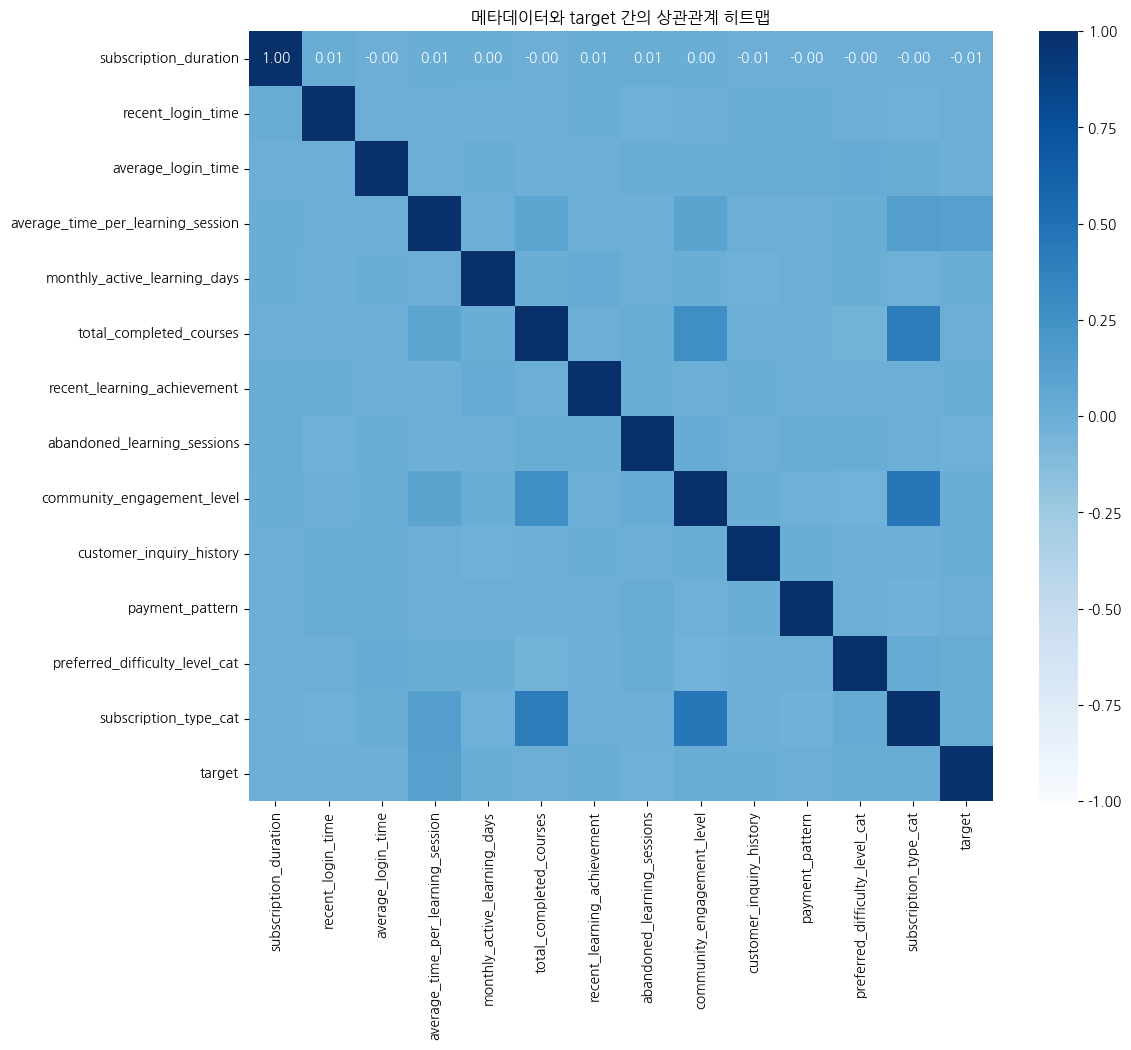

In [40]:

# 범주형 변수를 숫자로 인코딩
mini['preferred_difficulty_level'] = mini['preferred_difficulty_level'].astype('category')
mini['preferred_difficulty_level_cat'] = mini['preferred_difficulty_level'].cat.codes

# 구독 유형도 범주형 변수이므로 인코딩
mini['subscription_type'] = mini['subscription_type'].astype('category')
mini['subscription_type_cat'] = mini['subscription_type'].cat.codes

# 필요한 컬럼들만 선택하여 상관관계 분석
selected_columns = ['subscription_duration', 'recent_login_time', 'average_login_time', 
                    'average_time_per_learning_session', 'monthly_active_learning_days', 
                    'total_completed_courses', 'recent_learning_achievement', 
                    'abandoned_learning_sessions', 'community_engagement_level', 
                    'customer_inquiry_history', 'payment_pattern', 
                    'preferred_difficulty_level_cat', 'subscription_type_cat', 'target']
numeric_data = mini[selected_columns]

# 결측치 확인 및 처리
numeric_data = numeric_data.fillna(numeric_data.median())

# 상관관계 계산
correlation_matrix = numeric_data.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', vmin=-1, vmax=1)

plt.title('메타데이터와 target 간의 상관관계 히트맵')
plt.show()
